<a href="https://colab.research.google.com/github/ArushiAg22/arushi_data690/blob/main/assignment_05/Assignment05_part_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 05 Part 6**

## **Data Cleaning**

### **Missing Data**


In [1]:
import numpy as np
import pandas as pd

In [2]:
falsy_values = (0, False, None, '', [], {})

In [3]:
any(falsy_values)

False

In [4]:
np.nan

nan

In [5]:
3 + np.nan

nan

In [6]:
a = np.array([1, 2, 3, np.nan, np.nan, 4])

In [7]:
a.sum()

nan

In [8]:
a.mean()

nan

In [9]:
a = np.array([1, 2, 3, np.nan, None, 4], dtype='float')
a

array([ 1.,  2.,  3., nan, nan,  4.])

In [10]:
a = np.array([1, 2, 3, np.nan, np.nan, 4])

In [11]:
a.mean()

nan

In [12]:
a.sum()

nan

In [13]:
np.inf

inf

In [14]:
3 + np.inf

inf

In [15]:
np.inf / 3

inf

In [16]:
np.inf / np.inf

nan

In [17]:
b = np.array([1, 2, 3, np.inf, np.nan, 4], dtype=np.float)
b.sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


nan

In [18]:
np.isnan(np.nan)

True

In [19]:
np.isinf(np.inf)

True

In [20]:
np.isfinite(np.nan), np.isfinite(np.inf)

(False, False)

In [21]:
np.isnan(np.array([1, 2, 3, np.nan, np.inf, 4]))

array([False, False, False,  True, False, False])

In [22]:
np.isinf(np.array([1, 2, 3, np.nan, np.inf, 4]))

array([False, False, False, False,  True, False])

In [23]:
np.isfinite(np.array([1, 2, 3, np.nan, np.inf, 4]))

array([ True,  True,  True, False, False,  True])

In [24]:
a = np.array([1, 2, 3, np.nan, np.nan, 4])

In [25]:
a[~np.isnan(a)]

array([1., 2., 3., 4.])

In [26]:
a[np.isfinite(a)]

array([1., 2., 3., 4.])

In [27]:
a[np.isfinite(a)].sum()

10.0

In [28]:
a[np.isfinite(a)].mean()

2.5

### **Handling Missing Data with Pandas**

In [29]:
import numpy as np
import pandas as pd

In [30]:
pd.isnull(np.nan)

True

In [31]:
pd.isnull(None)

True

In [32]:
pd.isna(np.nan)

True

In [33]:
pd.isna(None)

True

In [34]:
pd.notnull(None)

False

In [35]:
pd.notnull(np.nan)

False

In [36]:
pd.notna(np.nan)

False

In [37]:
pd.notnull(3)

True

In [38]:
pd.isnull(pd.Series([1, np.nan, 7]))

0    False
1     True
2    False
dtype: bool

In [39]:
pd.notnull(pd.Series([1, np.nan, 7]))

0     True
1    False
2     True
dtype: bool

In [40]:
pd.isnull(pd.DataFrame({
    'Column A': [1, np.nan, 7],
    'Column B': [np.nan, 2, 3],
    'Column C': [np.nan, 2, np.nan]
}))

,Column A,Column B,Column C
0,False,True,True
1,True,False,False
2,False,False,True


In [41]:
pd.Series([1, 2, np.nan]).count()

2

In [42]:
pd.Series([1, 2, np.nan]).sum()

3.0

In [43]:
pd.Series([2, 2, np.nan]).mean()

2.0

In [44]:
s = pd.Series([1, 2, 3, np.nan, np.nan, 4])

In [45]:
pd.notnull(s)

0     True
1     True
2     True
3    False
4    False
5     True
dtype: bool

In [46]:
pd.isnull(s)

0    False
1    False
2    False
3     True
4     True
5    False
dtype: bool

In [47]:
pd.notnull(s).sum()

4

In [48]:
pd.isnull(s).sum()

2

In [49]:
s[pd.notnull(s)]

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

In [50]:
s.isnull()

0    False
1    False
2    False
3     True
4     True
5    False
dtype: bool

In [51]:
s.notnull()

0     True
1     True
2     True
3    False
4    False
5     True
dtype: bool

In [52]:
s[s.notnull()]

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

In [53]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

In [54]:
s.dropna()

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

In [55]:
df = pd.DataFrame({
    'Column A': [1, np.nan, 30, np.nan],
    'Column B': [2, 8, 31, np.nan],
    'Column C': [np.nan, 9, 32, 100],
    'Column D': [5, 8, 34, 110],
})
df

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [56]:
df.shape

(4, 4)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Column A  2 non-null      float64
 1   Column B  3 non-null      float64
 2   Column C  3 non-null      float64
 3   Column D  4 non-null      int64  
dtypes: float64(3), int64(1)
memory usage: 256.0 bytes


In [58]:
df.isnull()

,Column A,Column B,Column C,Column D
0,False,False,True,False
1,True,False,False,False
2,False,False,False,False
3,True,True,False,False


In [59]:
df.isnull().sum()

Column A    2
Column B    1
Column C    1
Column D    0
dtype: int64

In [60]:
df.dropna()

,Column A,Column B,Column C,Column D
2,30.0,31.0,32.0,34


In [61]:
df.dropna(axis=1)

,Column D
0,5
1,8
2,34
3,110


In [62]:
df2 = pd.DataFrame({
    'Column A': [1, np.nan, 30],
    'Column B': [2, np.nan, 31],
    'Column C': [np.nan, np.nan, 100]
})
df2

,Column A,Column B,Column C
0,1.0,2.0,NaN
1,NaN,NaN,NaN
2,30.0,31.0,100.0


In [63]:
df.dropna(how='all')

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [64]:
df.dropna(how='any')

,Column A,Column B,Column C,Column D
2,30.0,31.0,32.0,34


In [65]:
df

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [66]:
df.dropna(thresh=3)

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34


In [67]:
df.dropna(thresh=3, axis='columns')

,Column B,Column C,Column D
0,2.0,NaN,5
1,8.0,9.0,8
2,31.0,32.0,34
3,NaN,100.0,110


In [68]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

In [69]:
s.fillna(0)

0    1.0
1    2.0
2    3.0
3    0.0
4    0.0
5    4.0
dtype: float64

In [70]:
s.fillna(s.mean())

0    1.0
1    2.0
2    3.0
3    2.5
4    2.5
5    4.0
dtype: float64

In [71]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

In [72]:
s.fillna(method='ffill')

0    1.0
1    2.0
2    3.0
3    3.0
4    3.0
5    4.0
dtype: float64

In [73]:
s.fillna(method='bfill')

0    1.0
1    2.0
2    3.0
3    4.0
4    4.0
5    4.0
dtype: float64

In [74]:
pd.Series([np.nan, 3, np.nan, 9]).fillna(method='ffill')

0    NaN
1    3.0
2    3.0
3    9.0
dtype: float64

In [75]:
pd.Series([1, np.nan, 3, np.nan, np.nan]).fillna(method='bfill')

0    1.0
1    3.0
2    3.0
3    NaN
4    NaN
dtype: float64

In [76]:
df

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [77]:
df.fillna({'Column A': 0, 'Column B': 99, 'Column C': df['Column C'].mean()})

,Column A,Column B,Column C,Column D
0,1.0,2.0,47.0,5
1,0.0,8.0,9.0,8
2,30.0,31.0,32.0,34
3,0.0,99.0,100.0,110


In [78]:
df.fillna(method='ffill', axis=0)

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,1.0,8.0,9.0,8
2,30.0,31.0,32.0,34
3,30.0,31.0,100.0,110


In [79]:
df.fillna(method='ffill', axis=1)

,Column A,Column B,Column C,Column D
0,1.0,2.0,2.0,5.0
1,NaN,8.0,9.0,8.0
2,30.0,31.0,32.0,34.0
3,NaN,NaN,100.0,110.0


In [80]:
s.dropna().count()

4

In [81]:
missing_values = len(s.dropna()) != len(s)
missing_values

True

In [82]:
len(s)

6

In [83]:
s.count()

4

In [84]:
missing_values = s.count() != len(s)
missing_values

True

In [85]:
pd.Series([True, False, False]).any()

True

In [86]:
pd.Series([True, False, False]).all()

False

In [87]:
pd.Series([True, True, True]).all()

True

In [88]:
s.isnull()

0    False
1    False
2    False
3     True
4     True
5    False
dtype: bool

In [89]:
pd.Series([1, np.nan]).isnull().any()

True

In [90]:
pd.Series([1, 2]).isnull().any()

False

In [91]:
s.isnull().any()

True

In [92]:
s.isnull().values

array([False, False, False,  True,  True, False])

In [93]:
s.isnull().values.any()

True

### **Cleaning not-null values**

In [94]:
df = pd.DataFrame({
    'Sex': ['M', 'F', 'F', 'D', '?'],
    'Age': [29, 30, 24, 290, 25],
})
df

,Sex,Age
0,M,29
1,F,30
2,F,24
3,D,290
4,?,25


In [95]:
df['Sex'].unique()

array(['M', 'F', 'D', '?'], dtype=object)

In [96]:
df['Sex'].value_counts()

F    2
M    1
D    1
?    1
Name: Sex, dtype: int64

In [97]:
df['Sex'].replace('D', 'F')

0    M
1    F
2    F
3    F
4    ?
Name: Sex, dtype: object

In [98]:
df['Sex'].replace({'D': 'F', 'N': 'M'})

0    M
1    F
2    F
3    F
4    ?
Name: Sex, dtype: object

In [99]:
df.replace({
    'Sex': {
        'D': 'F',
        'N': 'M'
    },
    'Age': {
        290: 29
    }
})

,Sex,Age
0,M,29
1,F,30
2,F,24
3,F,29
4,?,25


In [100]:
df[df['Age'] > 100]

,Sex,Age
3,D,290


In [101]:
df.loc[df['Age'] > 100, 'Age'] = df.loc[df['Age'] > 100, 'Age'] / 10
df

,Sex,Age
0,M,29.0
1,F,30.0
2,F,24.0
3,D,29.0
4,?,25.0


In [102]:
ambassadors = pd.Series([
    'France',
    'United Kingdom',
    'United Kingdom',
    'Italy',
    'Germany',
    'Germany',
    'Germany',
], index=[
    'Gérard Araud',
    'Kim Darroch',
    'Peter Westmacott',
    'Armando Varricchio',
    'Peter Wittig',
    'Peter Ammon',
    'Klaus Scharioth '
])

ambassadors

Gérard Araud                  France
Kim Darroch           United Kingdom
Peter Westmacott      United Kingdom
Armando Varricchio             Italy
Peter Wittig                 Germany
Peter Ammon                  Germany
Klaus Scharioth              Germany
dtype: object

In [103]:
ambassadors.duplicated()

Gérard Araud          False
Kim Darroch           False
Peter Westmacott       True
Armando Varricchio    False
Peter Wittig          False
Peter Ammon            True
Klaus Scharioth        True
dtype: bool

In [104]:
ambassadors.duplicated(keep='last')

Gérard Araud          False
Kim Darroch            True
Peter Westmacott      False
Armando Varricchio    False
Peter Wittig           True
Peter Ammon            True
Klaus Scharioth       False
dtype: bool

In [105]:
ambassadors.duplicated(keep=False)

Gérard Araud          False
Kim Darroch            True
Peter Westmacott       True
Armando Varricchio    False
Peter Wittig           True
Peter Ammon            True
Klaus Scharioth        True
dtype: bool

In [106]:
ambassadors.drop_duplicates()

Gérard Araud                  France
Kim Darroch           United Kingdom
Armando Varricchio             Italy
Peter Wittig                 Germany
dtype: object

In [107]:
ambassadors.drop_duplicates(keep='last')

Gérard Araud                  France
Peter Westmacott      United Kingdom
Armando Varricchio             Italy
Klaus Scharioth              Germany
dtype: object

In [108]:
ambassadors.drop_duplicates(keep=False)

Gérard Araud          France
Armando Varricchio     Italy
dtype: object

In [109]:
players = pd.DataFrame({
    'Name': [
        'Kobe Bryant',
        'LeBron James',
        'Kobe Bryant',
        'Carmelo Anthony',
        'Kobe Bryant',
    ],
    'Pos': [
        'SG',
        'SF',
        'SG',
        'SF',
        'SF'
    ]
})

players

,Name,Pos
0,Kobe Bryant,SG
1,LeBron James,SF
2,Kobe Bryant,SG
3,Carmelo Anthony,SF
4,Kobe Bryant,SF


In [110]:
players.duplicated()

0    False
1    False
2     True
3    False
4    False
dtype: bool

In [111]:
players.duplicated(subset=['Name'])

0    False
1    False
2     True
3    False
4     True
dtype: bool

In [112]:
players.duplicated(subset=['Name'], keep='last')

0     True
1    False
2     True
3    False
4    False
dtype: bool

In [113]:
players.drop_duplicates()

,Name,Pos
0,Kobe Bryant,SG
1,LeBron James,SF
3,Carmelo Anthony,SF
4,Kobe Bryant,SF


In [114]:
players.drop_duplicates(subset=['Name'])

,Name,Pos
0,Kobe Bryant,SG
1,LeBron James,SF
3,Carmelo Anthony,SF


In [115]:
players.drop_duplicates(subset=['Name'], keep='last')

,Name,Pos
1,LeBron James,SF
3,Carmelo Anthony,SF
4,Kobe Bryant,SF


In [116]:
df = pd.DataFrame({
    'Data': [
        '1987_M_US _1',
        '1990?_M_UK_1',
        '1992_F_US_2',
        '1970?_M_   IT_1',
        '1985_F_I  T_2'
]})

df

,Data
0,1987_M_US _1
1,1990?_M_UK_1
2,1992_F_US_2
3,1970?_M_ IT_1
4,1985_F_I T_2


In [117]:
df['Data'].str.split('_')

0       [1987, M, US , 1]
1       [1990?, M, UK, 1]
2        [1992, F, US, 2]
3    [1970?, M,    IT, 1]
4      [1985, F, I  T, 2]
Name: Data, dtype: object

In [118]:
df['Data'].str.split('_', expand=True)

,0,1,2,3
0,1987,M,US,1
1,1990?,M,UK,1
2,1992,F,US,2
3,1970?,M,IT,1
4,1985,F,I T,2


In [119]:
df = df['Data'].str.split('_', expand=True)

In [120]:
df.columns = ['Year', 'Sex', 'Country', 'No Children']

In [121]:
df['Year'].str.contains('\?')

0    False
1     True
2    False
3     True
4    False
Name: Year, dtype: bool

In [122]:
df['Country'].str.contains('U')

0     True
1     True
2     True
3    False
4    False
Name: Country, dtype: bool

In [123]:
df['Country'].str.strip()

0      US
1      UK
2      US
3      IT
4    I  T
Name: Country, dtype: object

In [124]:
df['Country'].str.replace(' ', '')

0    US
1    UK
2    US
3    IT
4    IT
Name: Country, dtype: object

In [125]:
df['Year'].str.replace(r'(?P<year>\d{4})\?', lambda m: m.group('year'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


0    1987
1    1990
2    1992
3    1970
4    1985
Name: Year, dtype: object

### **More Visualizations**

In [126]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [127]:
x = np.arange(-10, 11)

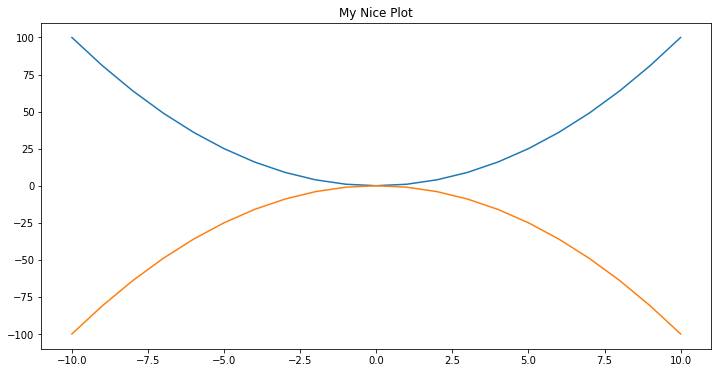

In [128]:
plt.figure(figsize=(12, 6))

plt.title('My Nice Plot')

plt.plot(x, x ** 2)
plt.plot(x, -1 * (x ** 2))

Text(0, 0.5, 'X Squared')

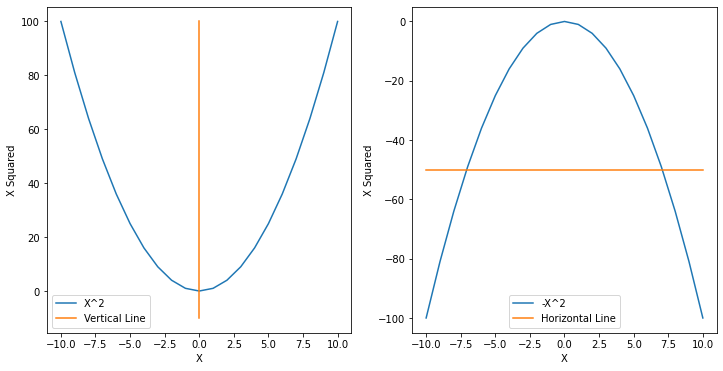

In [129]:
plt.figure(figsize=(12, 6))
plt.title('My Nice Plot')

plt.subplot(1, 2, 1)  # rows, columns, panel selected
plt.plot(x, x ** 2)
plt.plot([0, 0, 0], [-10, 0, 100])
plt.legend(['X^2', 'Vertical Line'])
plt.xlabel('X')
plt.ylabel('X Squared')

plt.subplot(1, 2, 2)
plt.plot(x, -1 * (x ** 2))
plt.plot([-10, 0, 10], [-50, -50, -50])
plt.legend(['-X^2', 'Horizontal Line'])

plt.xlabel('X')
plt.ylabel('X Squared')

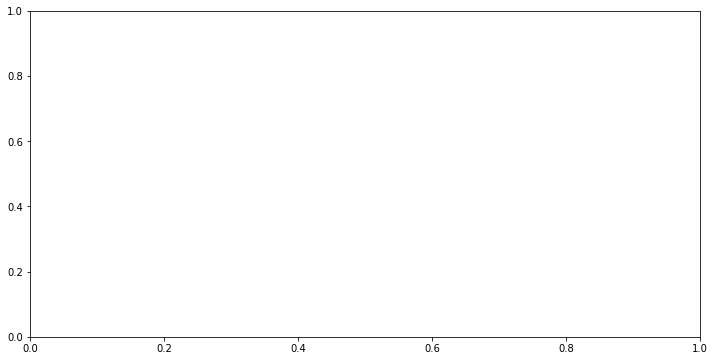

In [130]:
fig, axes = plt.subplots(figsize=(12, 6))

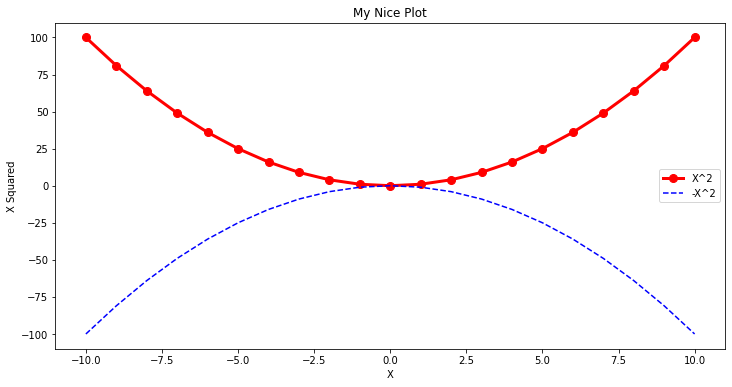

In [131]:
axes.plot(
    x, (x ** 2), color='red', linewidth=3,
    marker='o', markersize=8, label='X^2')

axes.plot(x, -1 * (x ** 2), 'b--', label='-X^2')

axes.set_xlabel('X')
axes.set_ylabel('X Squared')

axes.set_title("My Nice Plot")

axes.legend()

fig

Text(0.5, 1.0, 'My Nice Plot')

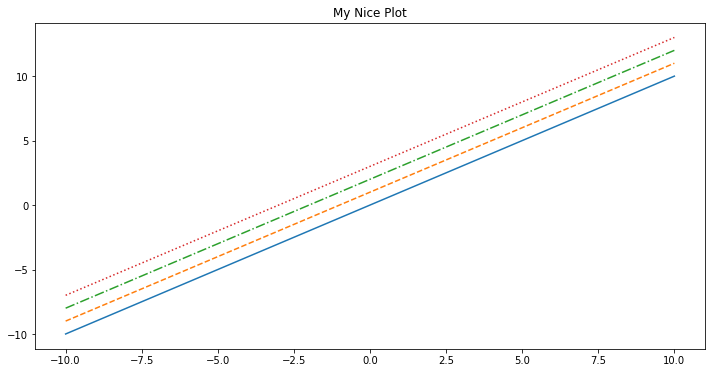

In [132]:
fig, axes = plt.subplots(figsize=(12, 6))

axes.plot(x, x + 0, linestyle='solid')
axes.plot(x, x + 1, linestyle='dashed')
axes.plot(x, x + 2, linestyle='dashdot')
axes.plot(x, x + 3, linestyle='dotted');

axes.set_title("My Nice Plot")

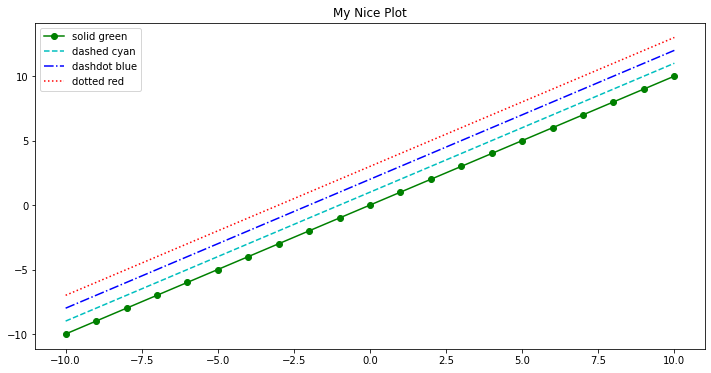

In [133]:
fig, axes = plt.subplots(figsize=(12, 6))

axes.plot(x, x + 0, '-og', label="solid green")
axes.plot(x, x + 1, '--c', label="dashed cyan")
axes.plot(x, x + 2, '-.b', label="dashdot blue")
axes.plot(x, x + 3, ':r', label="dotted red")

axes.set_title("My Nice Plot")

axes.legend()

In [134]:
print('Markers: {}'.format([m for m in plt.Line2D.markers]))

Markers: ['.', ',', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_', 'P', 'X', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'None', None, ' ', '']


In [135]:
linestyles = ['_', '-', '--', ':']

print('Line styles: {}'.format(linestyles))

Line styles: ['_', '-', '--', ':']


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f88e4c139d0>)

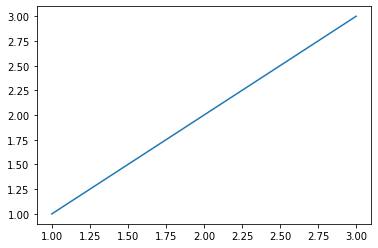

In [136]:
plot_objects = plt.subplots()

fig, ax = plot_objects

ax.plot([1,2,3], [1,2,3])

plot_objects

(<Figure size 1008x432 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f88e4a46a10>,
       dtype=object))

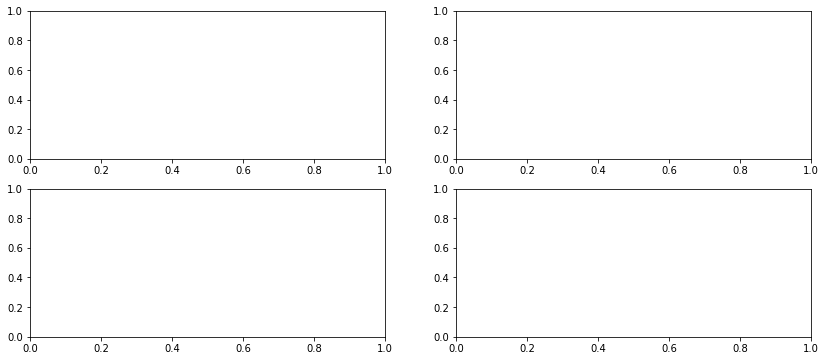

In [137]:
plot_objects = plt.subplots(nrows=2, ncols=2, figsize=(14, 6))

fig, ((ax1, ax2), (ax3, ax4)) = plot_objects

plot_objects

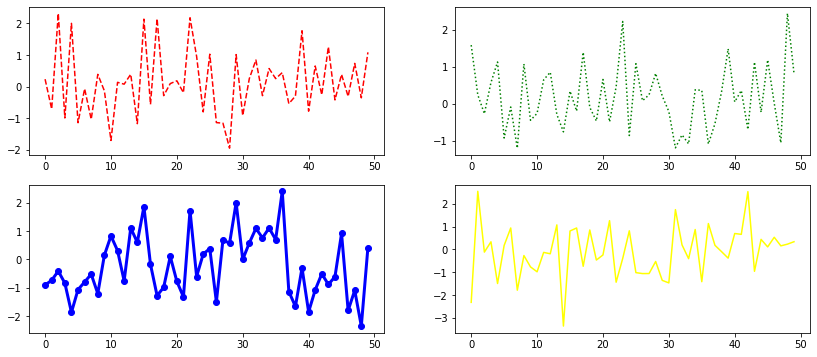

In [138]:
ax4.plot(np.random.randn(50), c='yellow')
ax1.plot(np.random.randn(50), c='red', linestyle='--')
ax2.plot(np.random.randn(50), c='green', linestyle=':')
ax3.plot(np.random.randn(50), c='blue', marker='o', linewidth=3.0)


fig

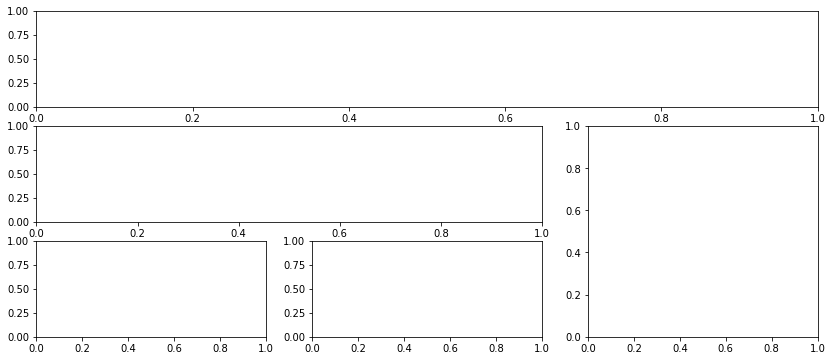

In [139]:
plt.figure(figsize=(14, 6))

ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))

In [140]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (20 * np.random.rand(N))**2

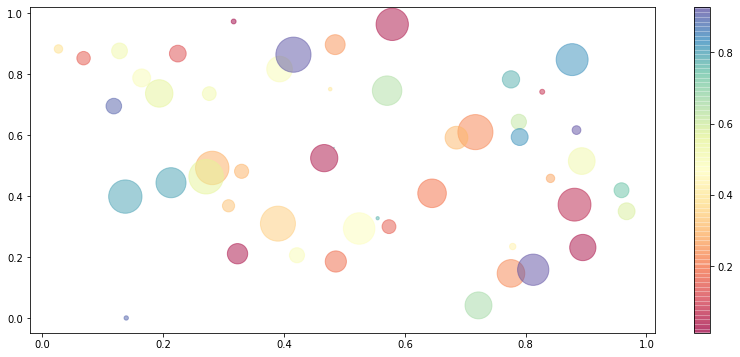

In [141]:
plt.figure(figsize=(14, 6))

plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Spectral')
plt.colorbar()

plt.show()

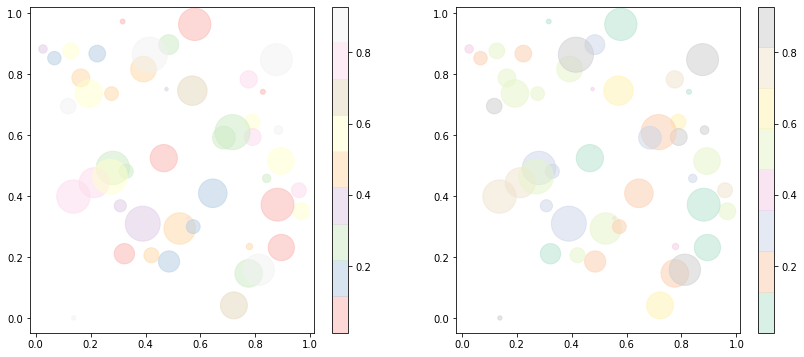

In [142]:
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(1,2,1)
plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Pastel1')
plt.colorbar()

ax2 = fig.add_subplot(1,2,2)
plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Pastel2')
plt.colorbar()

plt.show()

In [143]:
values = np.random.randn(1000)

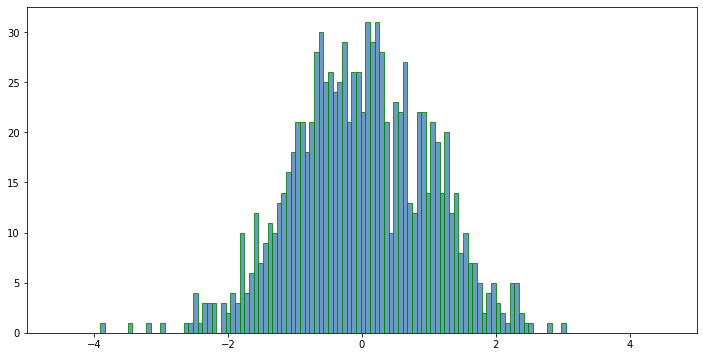

In [144]:
plt.subplots(figsize=(12, 6))

plt.hist(values, bins=100, alpha=0.8,
          histtype='bar', color='steelblue',
          edgecolor='green')
plt.xlim(xmin=-5, xmax=5)

plt.show()

In [145]:
from scipy import stats

density = stats.kde.gaussian_kde(values)
density

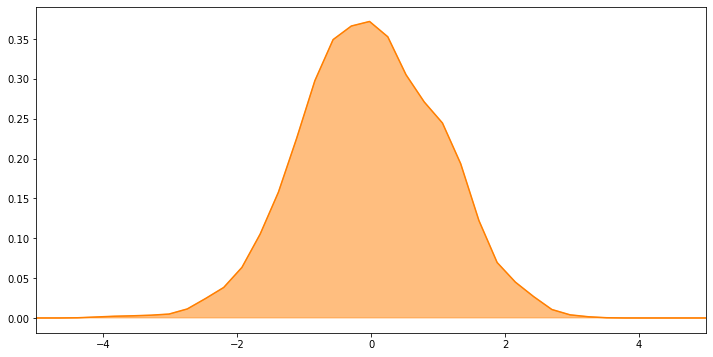

In [146]:
plt.subplots(figsize=(12, 6))

values2 = np.linspace(min(values)-10, max(values)+10, 100)

plt.plot(values2, density(values2), color='#FF7F00')
plt.fill_between(values2, 0, density(values2), alpha=0.5, color='#FF7F00')
plt.xlim(xmin=-5, xmax=5)

plt.show()

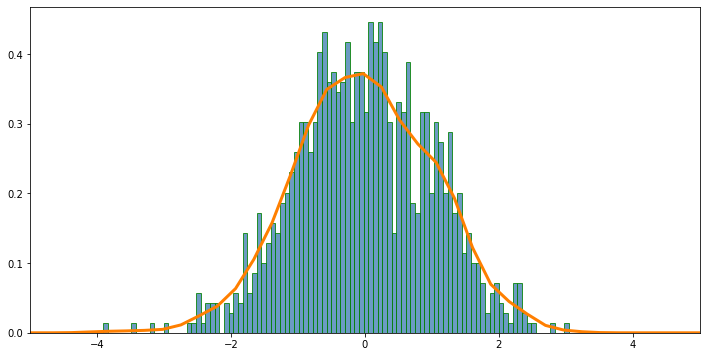

In [147]:
plt.subplots(figsize=(12, 6))

plt.hist(values, bins=100, alpha=0.8, density=1,
          histtype='bar', color='steelblue',
          edgecolor='green')

plt.plot(values2, density(values2), color='#FF7F00', linewidth=3.0)
plt.xlim(xmin=-5, xmax=5)

plt.show()

In [148]:
Y = np.random.rand(1, 5)[0]
Y2 = np.random.rand(1, 5)[0]

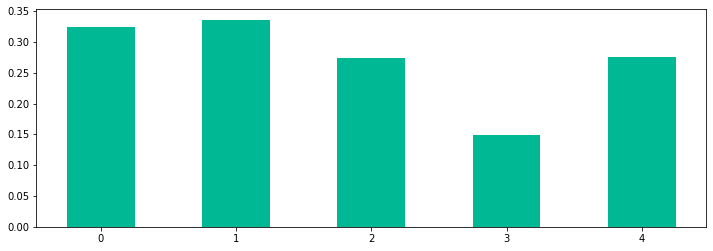

In [149]:
plt.figure(figsize=(12, 4))

barWidth = 0.5
plt.bar(np.arange(len(Y)), Y, width=barWidth, color='#00b894')

plt.show()

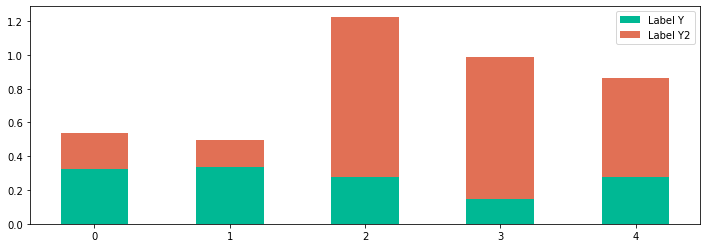

In [150]:
plt.figure(figsize=(12, 4))

barWidth = 0.5
plt.bar(np.arange(len(Y)), Y, width=barWidth, color='#00b894', label='Label Y')
plt.bar(np.arange(len(Y2)), Y2, width=barWidth, color='#e17055', bottom=Y, label='Label Y2')

plt.legend()
plt.show()

In [151]:
values = np.concatenate([np.random.randn(10), np.array([10, 15, -10, -15])])

(array([1., 1., 0., 0., 7., 3., 0., 0., 1., 1.]),
 array([-15., -12.,  -9.,  -6.,  -3.,   0.,   3.,   6.,   9.,  12.,  15.]),
 <a list of 10 Patch objects>)

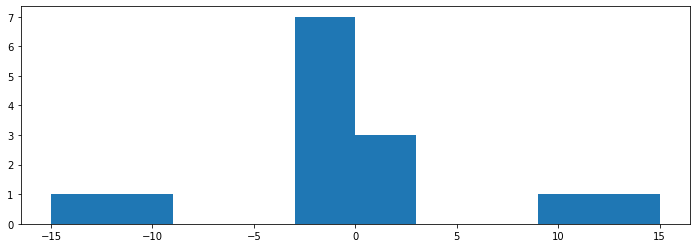

In [152]:
plt.figure(figsize=(12, 4))

plt.hist(values)

{'boxes': [<matplotlib.lines.Line2D at 0x7f88d27406d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f88d27d0f90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f88d277da90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f88d277d090>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f88d274a550>,
  <matplotlib.lines.Line2D at 0x7f88d27d0ed0>]}

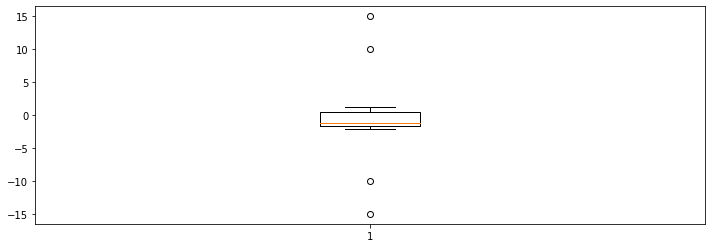

In [153]:
plt.figure(figsize=(12, 4))

plt.boxplot(values)

### **Real Life Example**

In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [155]:
df = pd.read_csv(
    'btc-eth-prices-outliers.csv',
    index_col=0,
    parse_dates=True
)

In [156]:
df.head()

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23


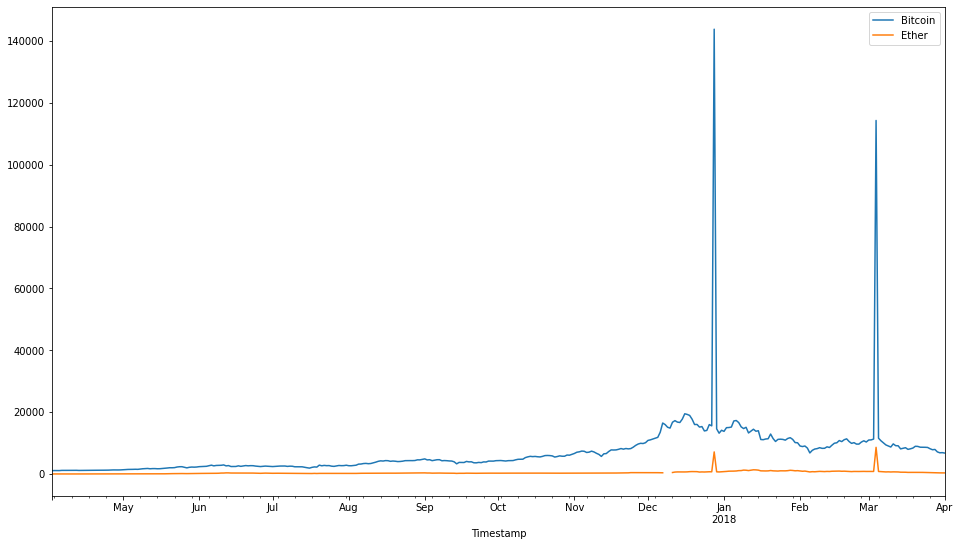

In [157]:
df.plot(figsize=(16, 9))

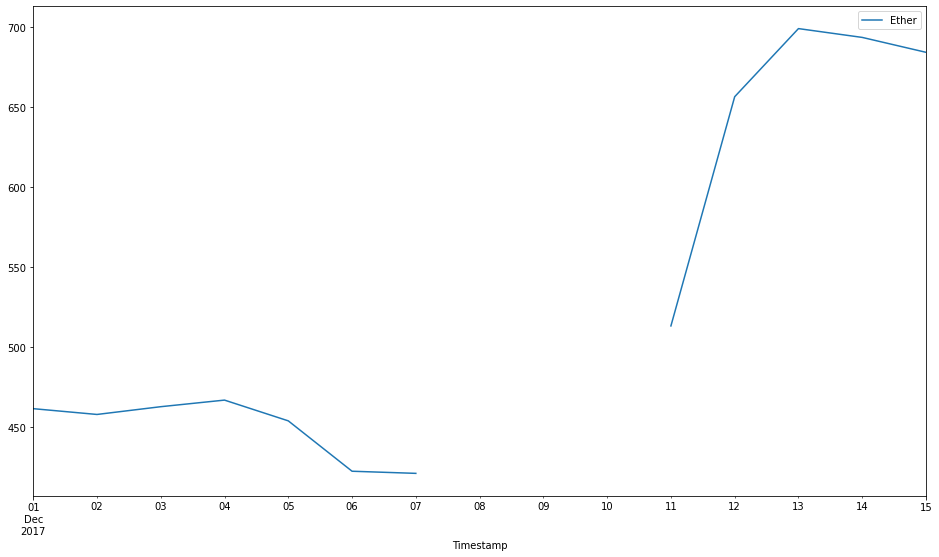

In [158]:
df.loc['2017-12': '2017-12-15'].plot(y='Ether', figsize=(16, 9))

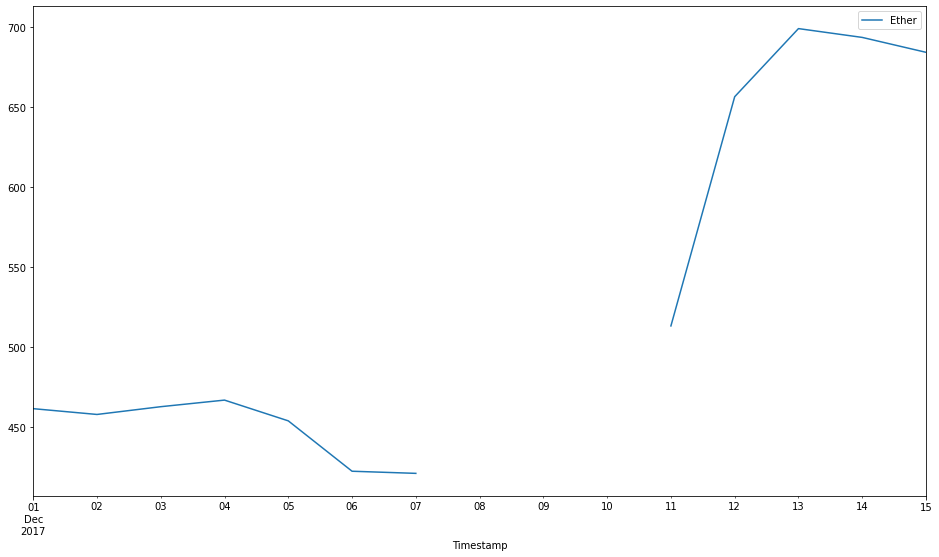

In [159]:
df.loc['2017-12': '2017-12-15'].plot(y='Ether', figsize=(16, 9))

In [160]:
df_na = df.loc['2017-12': '2017-12-15']

In [161]:
df_na['Ether'].isna().values.any()

True

In [162]:
df_na.loc[df_na['Ether'].isna()]

,Bitcoin,Ether
Timestamp,,
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN


In [163]:
df.loc['2017-12-06': '2017-12-12']

,Bitcoin,Ether
Timestamp,,
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52


In [164]:
df.loc['2017-12-06': '2017-12-12'].fillna(method='bfill')

,Bitcoin,Ether
Timestamp,,
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,513.29
2017-12-09,15142.834152,513.29
2017-12-10,14869.805000,513.29
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52


In [165]:
df.fillna(method='bfill', inplace=True)

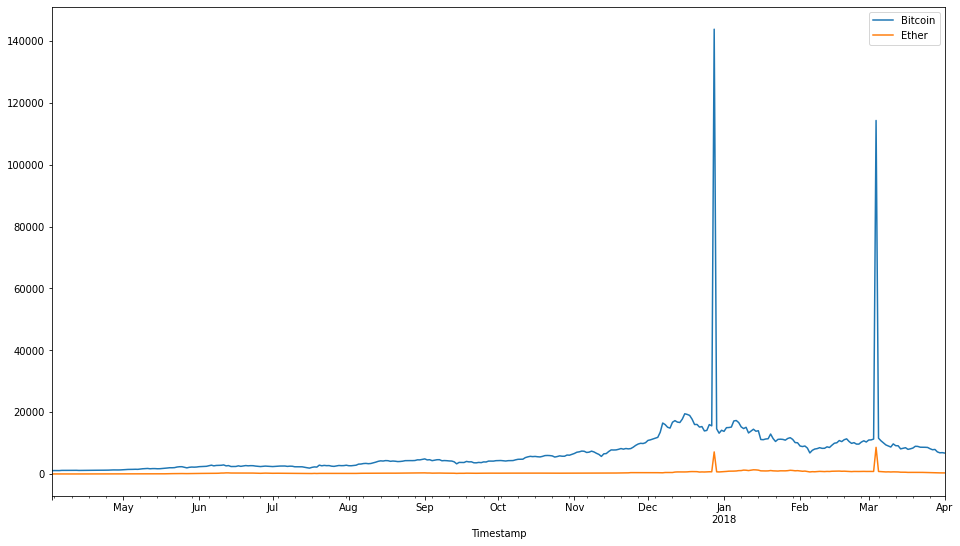

In [166]:
df.plot(figsize=(16, 9))

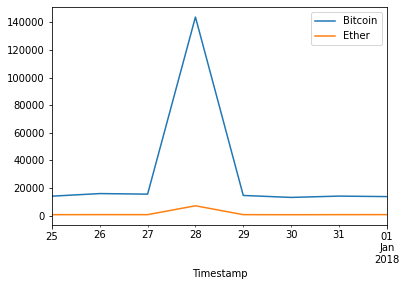

In [167]:
df['2017-12-25':'2018-01-01'].plot()

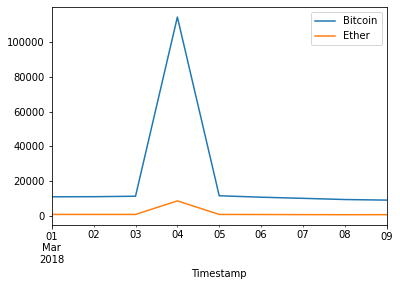

In [168]:
df['2018-03-01': '2018-03-09'].plot()

In [169]:
df_cleaned = df.drop(pd.to_datetime(['2017-12-28', '2018-03-04']))

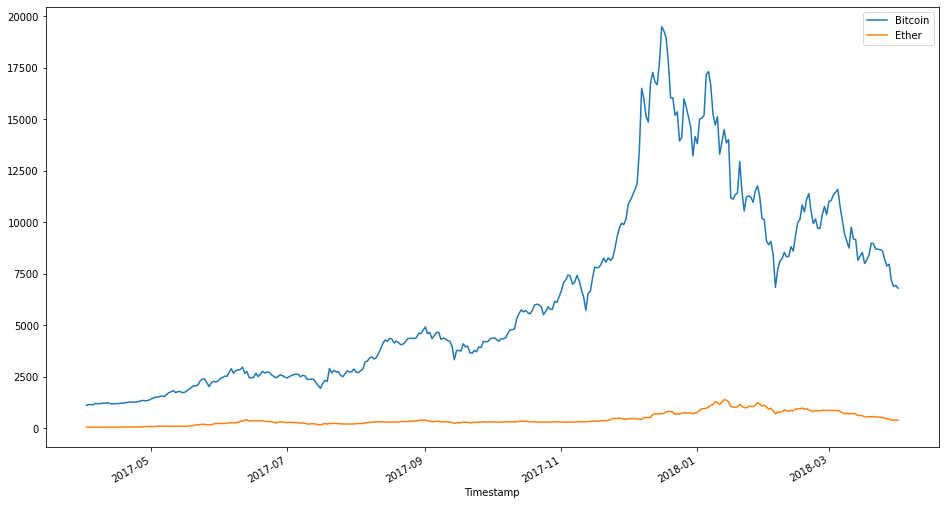

In [170]:
df_cleaned.plot(figsize=(16, 9))

In [171]:
df.mean()

Bitcoin    6996.004022
Ether       469.609068
dtype: float64

In [172]:
df_cleaned.mean()

Bitcoin    6323.509186
Ether       428.628402
dtype: float64

In [173]:
df.median()

Bitcoin    4594.98785
Ether       309.49000
dtype: float64

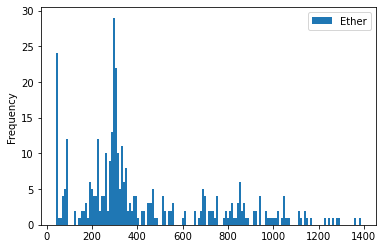

In [174]:
df_cleaned.plot(kind='hist', y='Ether', bins=150)

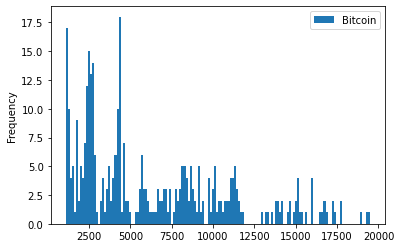

In [175]:
df_cleaned.plot(kind='hist', y='Bitcoin', bins=150)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


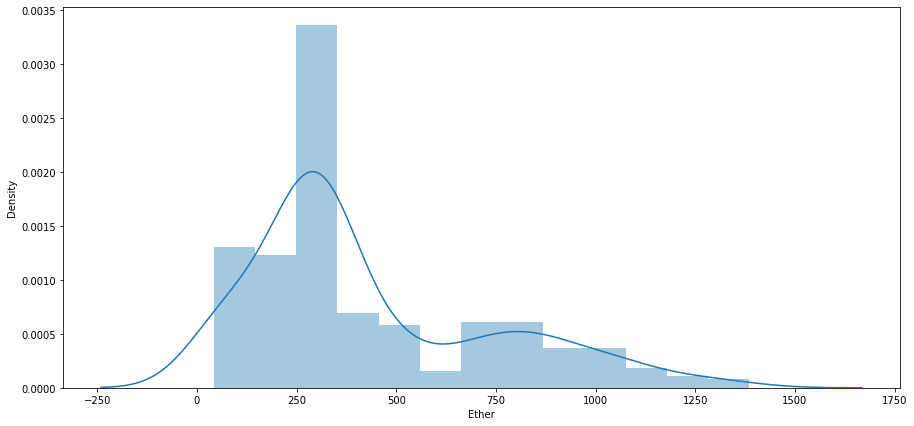

In [176]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Ether'], ax=ax)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


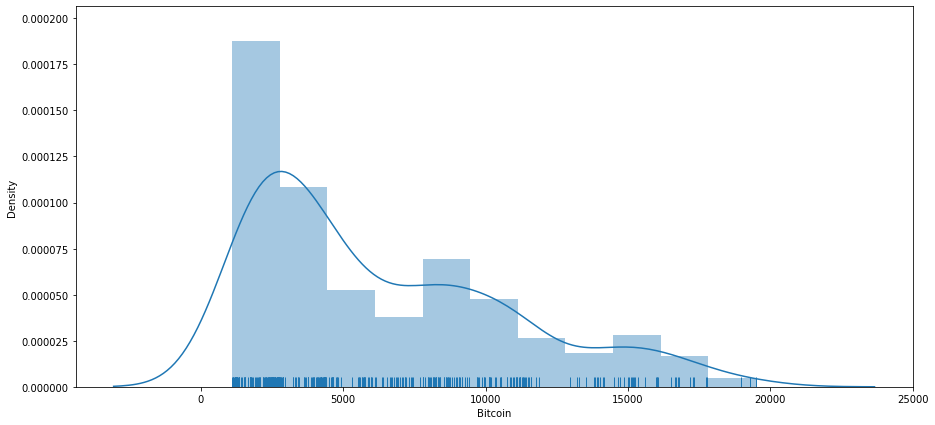

In [177]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Bitcoin'], rug=True, ax=ax)

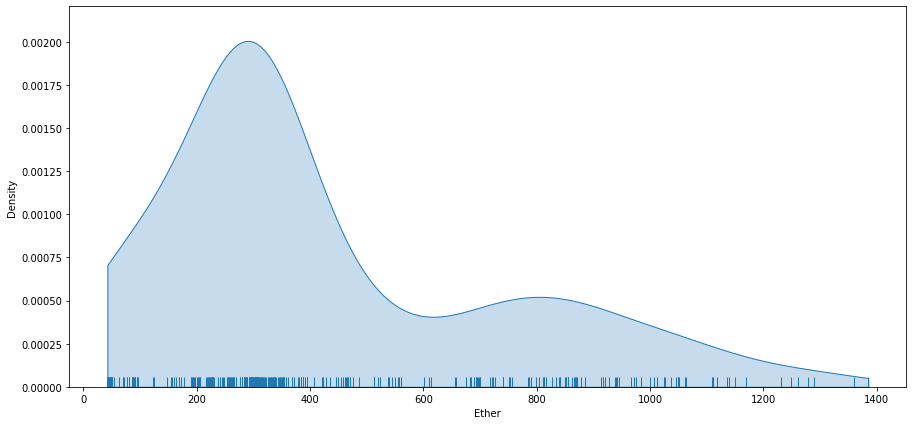

In [178]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.kdeplot(df_cleaned['Ether'], shade=True, cut=0, ax=ax)
sns.rugplot(df_cleaned['Ether'], ax=ax);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


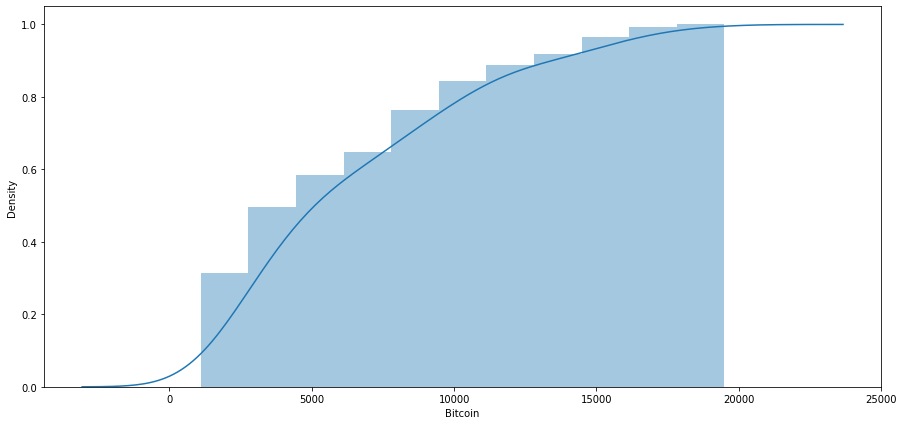

In [179]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Bitcoin'], ax=ax,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


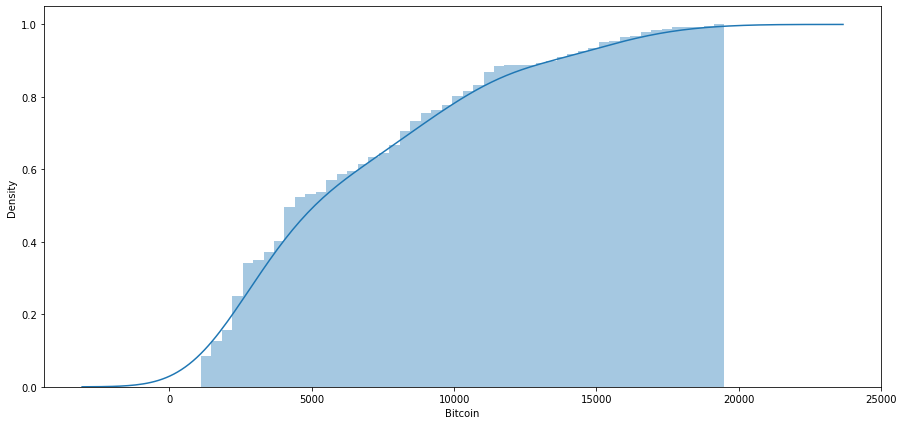

In [180]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Bitcoin'], ax=ax, bins=50,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2182: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


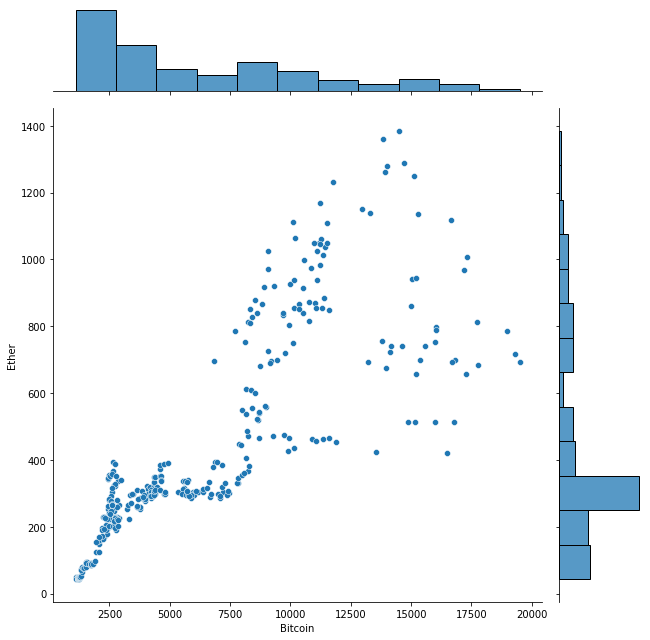

In [181]:
sns.jointplot(x="Bitcoin", y="Ether", data=df_cleaned, size=9)

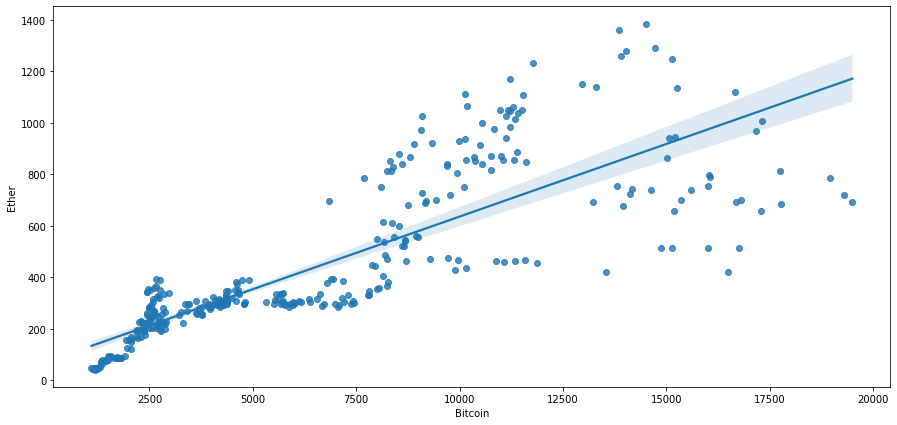

In [182]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.regplot(x="Bitcoin", y="Ether", data=df_cleaned, ax=ax)

In [183]:
df_cleaned['Bitcoin'].quantile(.2)

2438.8627342857144

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


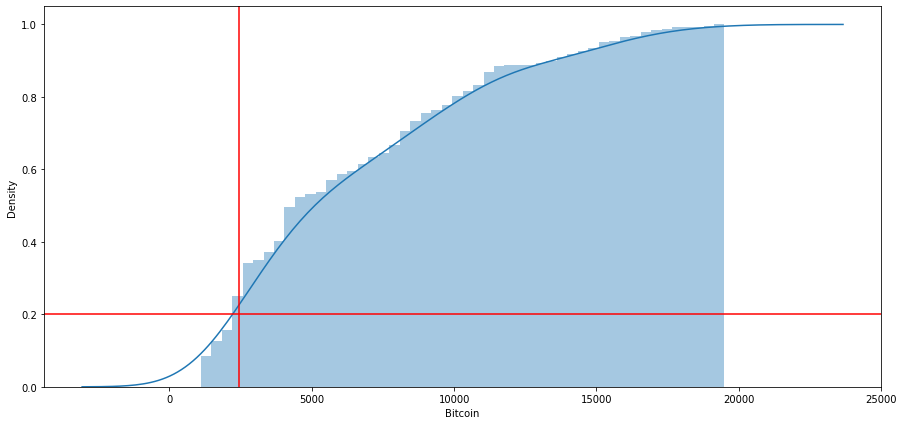

In [184]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Bitcoin'], ax=ax, bins=50,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
ax.axhline(0.2, color='red')
ax.axvline(df_cleaned['Bitcoin'].quantile(.2), color='red')

In [185]:
df_cleaned['Bitcoin'].quantile(.5)

4580.387479999999

In [186]:
df_cleaned['Bitcoin'].median()

4580.387479999999

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


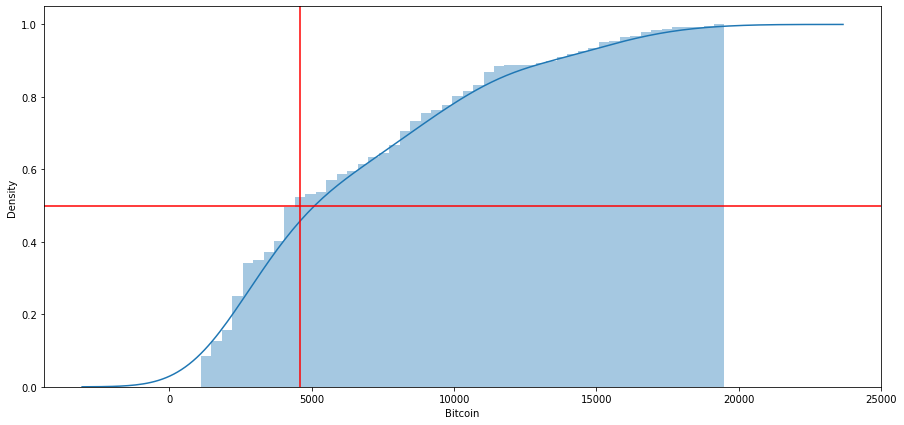

In [187]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Bitcoin'], ax=ax, bins=50,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
ax.axhline(0.5, color='red')
ax.axvline(df_cleaned['Bitcoin'].quantile(.5), color='red')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


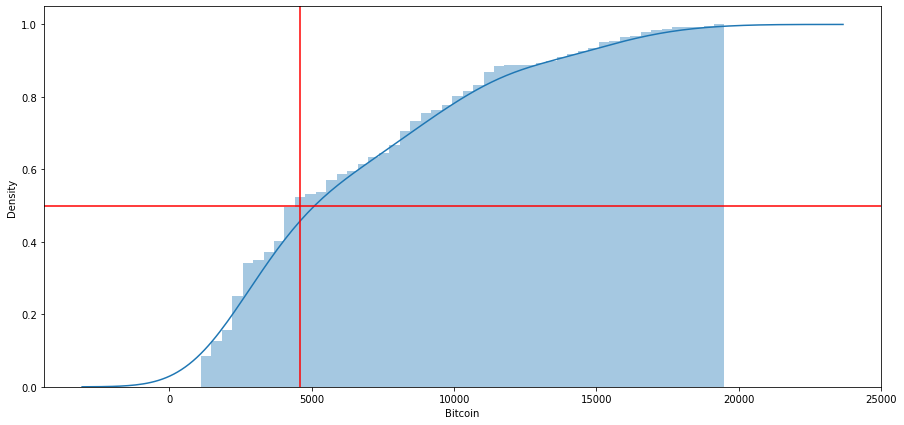

In [188]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Bitcoin'], ax=ax, bins=50,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
ax.axhline(0.5, color='red')
ax.axvline(df_cleaned['Bitcoin'].median(), color='red')

In [189]:
df['Bitcoin'].max() - df['Bitcoin'].min()

142706.6475416667

In [190]:
df_cleaned['Bitcoin'].max() - df_cleaned['Bitcoin'].min()

18399.51420833333

In [191]:
df['Bitcoin'].var()

103766537.75278114

In [192]:
df['Bitcoin'].std()

10186.586167739471

In [193]:
df_cleaned['Bitcoin'].std()

4513.757662530282

In [194]:
df['Bitcoin'].quantile(.75) - df['Bitcoin'].quantile(.25)

6597.494147619047

In [195]:
df_cleaned['Bitcoin'].quantile(.75) - df_cleaned['Bitcoin'].quantile(.25)

6548.249242559523

In [196]:
upper_limit = df['Bitcoin'].mean() + 2 * df['Bitcoin'].std()
lower_limit = df['Bitcoin'].mean() - 2 * df['Bitcoin'].std()

In [197]:
print("Upper Limit: {}".format(upper_limit))
print("Lower Limit: {}".format(lower_limit))

Upper Limit: 27369.17635730168
Lower Limit: -13377.168313656206


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


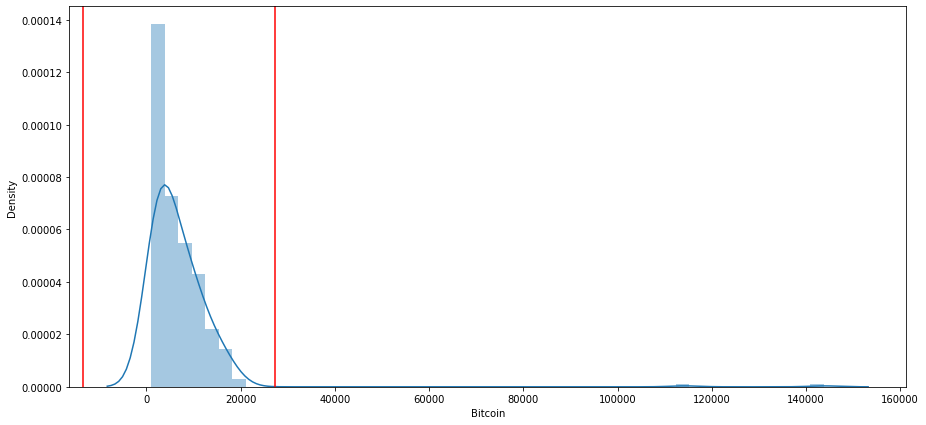

In [198]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df['Bitcoin'], ax=ax)
ax.axvline(lower_limit, color='red')
ax.axvline(upper_limit, color='red')

In [199]:
iqr = df['Bitcoin'].quantile(.75) - df['Bitcoin'].quantile(.25)
iqr

6597.494147619047

In [200]:
upper_limit = df['Bitcoin'].mean() + 2 * iqr
lower_limit = df['Bitcoin'].mean() - 2 * iqr

In [201]:
print("Upper Limit: {}".format(upper_limit))
print("Lower Limit: {}".format(lower_limit))

Upper Limit: 20190.99231706083
Lower Limit: -6198.984273415356


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


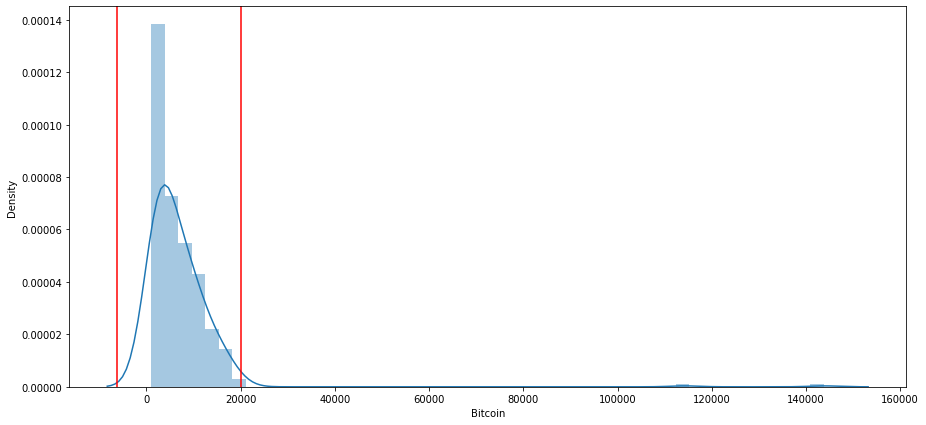

In [202]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df['Bitcoin'], ax=ax)
ax.axvline(lower_limit, color='red')
ax.axvline(upper_limit, color='red')

In [203]:
upper_limit = df['Bitcoin'].mean() + 2 * df['Bitcoin'].std()

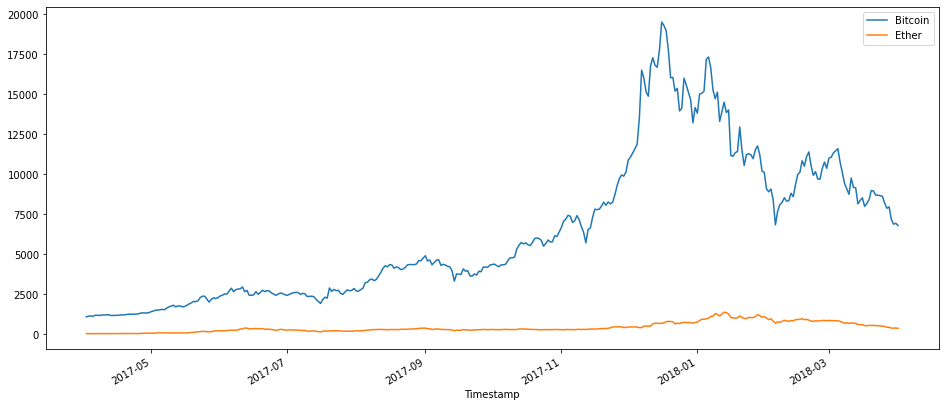

In [204]:
df[df['Bitcoin'] < upper_limit].plot(figsize=(16, 7))

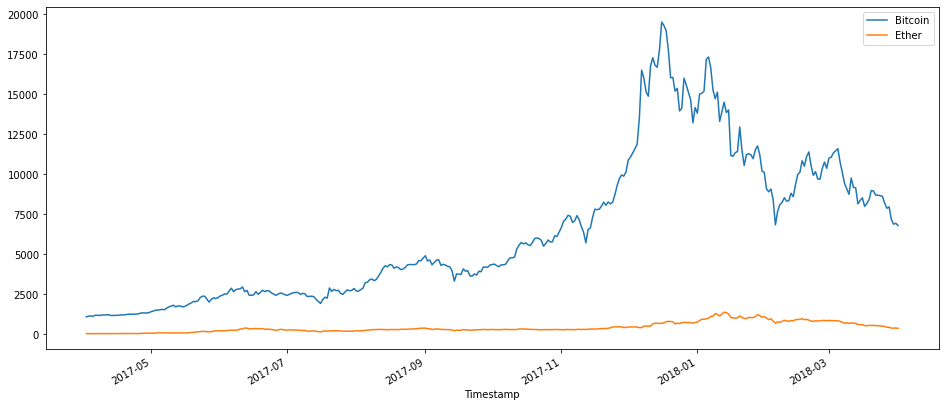

In [205]:
df.drop(df[df['Bitcoin'] > upper_limit].index).plot(figsize=(16, 7))